In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('churn.csv',)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.gender= df.gender.map({'Male':1,'Female':0})
df.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [ ]:
df.Partner = df.Partner.map({'Yes':1 , 'No':0})
df.Dependents = df.Dependents.map({'Yes':1 , 'No':0})
df.PhoneService = df.PhoneService.map({'Yes':1 , 'No':0})


In [ ]:
df.Partner.value_counts()
df.Dependents.value_counts()
df.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.OnlineSecurity = df.OnlineSecurity.map({'Yes':2 , 'No':1, 'No internet service':0})
df.OnlineBackup = df.OnlineBackup.map({'Yes':2 , 'No':1 , 'No internet service':0})
df.DeviceProtection = df.DeviceProtection.map({'Yes':2 , 'No':1 , 'No internet service':0})


In [ ]:
df.OnlineSecurity.value_counts()
df.OnlineBackup.value_counts()
df.DeviceProtection.value_counts()

1    3095
2    2422
0    1526
Name: DeviceProtection, dtype: int64

In [ ]:
df.TechSupport = df.TechSupport.map({'Yes':2 , 'No':1 , 'No internet service':0})
df.StreamingMovies = df.StreamingMovies.map({'Yes':2 , 'No':1 , 'No internet service':0})
df.StreamingTV = df.StreamingTV.map({'Yes':2 , 'No':1 , 'No internet service':0})
df.Churn = df.Churn.map({'Yes':1 , 'No':0})
df.PaperlessBilling = df.PaperlessBilling.map({'Yes':1 , 'No':0})
df.InternetService = df.InternetService.map({'Fiber optic':2 , 'DSL':1, 'No':0})


In [ ]:
df.MultipleLines = df.MultipleLines.map({'No phone service':0 , 'No':1 ,'Yes':2})
df.Contract = df.Contract.map({'Month-to-month':0,
                                'One year':1,
                                'Two year':2,
                                })

df.PaymentMethod = df.PaymentMethod.map({
'Electronic check'         :1,    
'Mailed check'             :2,   
'Bank transfer (automatic)':3,    
'Credit card (automatic)' :4
})



In [ ]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

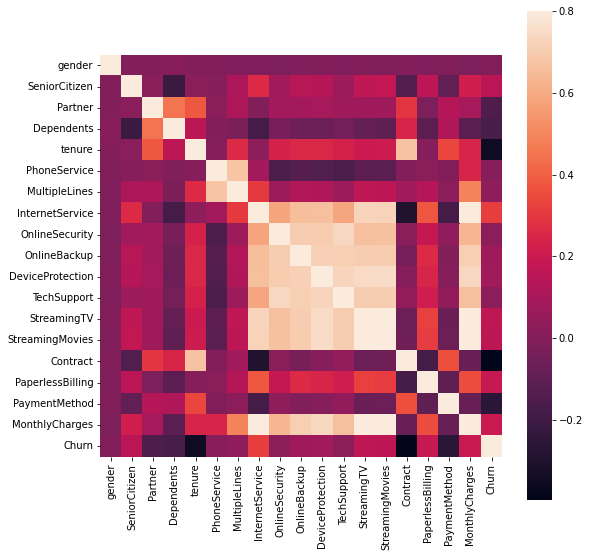

In [ ]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [ ]:
df.drop('customerID',inplace=True,axis=1)


In [ ]:
df.drop('TotalCharges',inplace=True,axis=1)


In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,1.325004,1.222916,1.069999,1.128212,1.127219,1.073548,1.167684,1.171234,0.690473,0.592219,2.315633,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.778877,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,118.750000,1.000000


In [ ]:
target_label = {'Yes':1 , 'No':0}

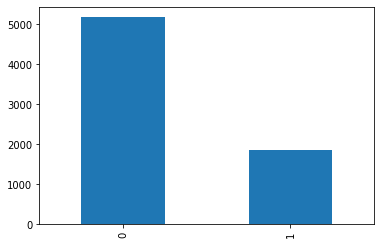

In [ ]:
df['Churn'].value_counts().plot(kind ='bar')

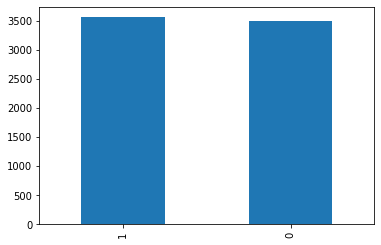

In [ ]:
df.gender.value_counts().plot(kind = 'bar')

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [ ]:
IQR = q3-q1

In [ ]:
IQR

gender               1.00
SeniorCitizen        0.00
Partner              1.00
Dependents           1.00
tenure              46.00
PhoneService         0.00
MultipleLines        1.00
InternetService      1.00
OnlineSecurity       1.00
OnlineBackup         1.00
DeviceProtection     1.00
TechSupport          1.00
StreamingTV          1.00
StreamingMovies      1.00
Contract             1.00
PaperlessBilling     1.00
PaymentMethod        2.00
MonthlyCharges      54.35
Churn                1.00
dtype: float64

In [ ]:
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_no_outlier

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,2,56.95,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,2,53.85,1
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,1
5,0,0,0,0,8,1,2,2,1,1,2,1,2,2,0,1,1,99.65,1
6,1,0,0,1,22,1,2,2,1,2,1,1,2,1,0,1,4,89.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,0,0,0,19,1,1,2,1,1,1,1,2,1,0,1,3,78.70,0
7037,0,0,0,0,72,1,1,0,0,0,0,0,0,0,2,1,3,21.15,0
7038,1,0,1,1,24,1,2,1,2,1,2,2,2,2,1,1,2,84.80,0
7039,0,0,1,1,72,1,2,2,1,2,2,1,2,2,1,1,4,103.20,0


In [ ]:
df.shape

(7043, 19)

In [ ]:
df_no_outlier.shape

(5323, 19)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
x = df[[  'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
              'PaymentMethod', 'MonthlyCharges']]

y_target = df['Churn']

In [ ]:
type(x)


pandas.core.frame.DataFrame

In [ ]:
y_target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y_target , test_size=0.3, random_state=42)

In [ ]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x,y_target,test_size=0.30,random_state=42)

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_b,y_train_b)
clf1=clf.score(x_test_b,y_test_b)
clf1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8116422148603881

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt1=clf.score(x_test_b,y_test_b)
dt1

0.8116422148603881

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_b,y_train_b)
knn1=knn.score(x_test_b,y_test_b)
knn1

0.7567439659252247

In [ ]:
nb = GaussianNB()
nb.fit(x_train_b , y_train_b)
nb1 =nb.score(x_test_b ,y_test_b)
nb1

0.7378135352579271

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_b ,y_train_b)
rf1=rf.score(x_test,y_test_b)
rf1


0.7908187411263606

In [ ]:
import joblib

In [ ]:
model_file = open('LR1_loan.pkl', 'wb')
joblib.dump(clf1,model_file)
model_file.close()

In [ ]:
model_file = open('RF1_loan.pkl', 'wb')
joblib.dump(rf1,model_file)
model_file.close()  

In [ ]:
model_file = open('DT1_loan.pkl', 'wb')
joblib.dump(dt1,model_file)
model_file.close()

In [ ]:
model_file = open('KNN1_Loan.pkl', 'wb')
joblib.dump(knn1,model_file)
model_file.close()

In [ ]:
model_file = open('NB1_Loan.pkl', 'wb')
joblib.dump(nb1,model_file)
model_file.close()

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [ ]:
feature_names_best = x.columns

In [ ]:
target_names = ["No","Yes"]

In [ ]:
dot_data = tree.export_graphviz(dt,out_file=None,feature_names=feature_names_best,class_names=target_names)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.563462 to fit



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = knn.predict(x_test_b)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[1314,  225],
       [ 289,  285]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

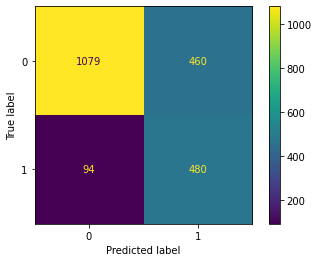

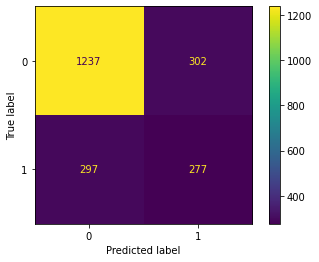

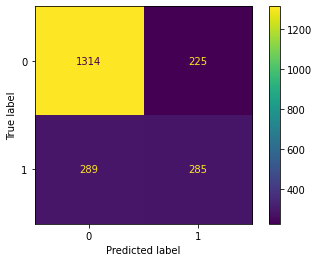

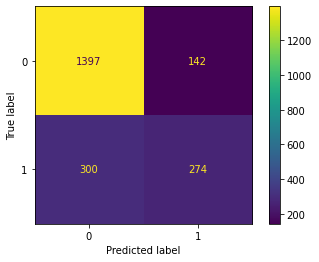

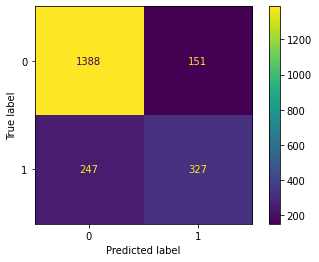

In [ ]:
plot_confusion_matrix(nb,x_test_b,y_test_b)
plot_confusion_matrix(dt,x_test_b,y_test_b)
plot_confusion_matrix(knn,x_test_b,y_test_b)
plot_confusion_matrix(rf,x_test_b,y_test_b)
plot_confusion_matrix(clf,x_test_b,y_test_b)

In [ ]:
df.to_csv("temiz_veri",index=False)